### Numerical issues

This notebook showcases numerical issues which exist in the function `k_of_n_uniform_a_b_using_multinomial` in the main notebook for calculating the CDF using the multinomial approach. It shows that these issues aren't due to an incorrect formula, but due to numerical issues. As such, these can be fixed by using the `decimal` library for greater precision, as done in the function `k_of_n_uniform_a_b_using_multinomial_fixed` in this notebook.

lambda_MLE = 20.0


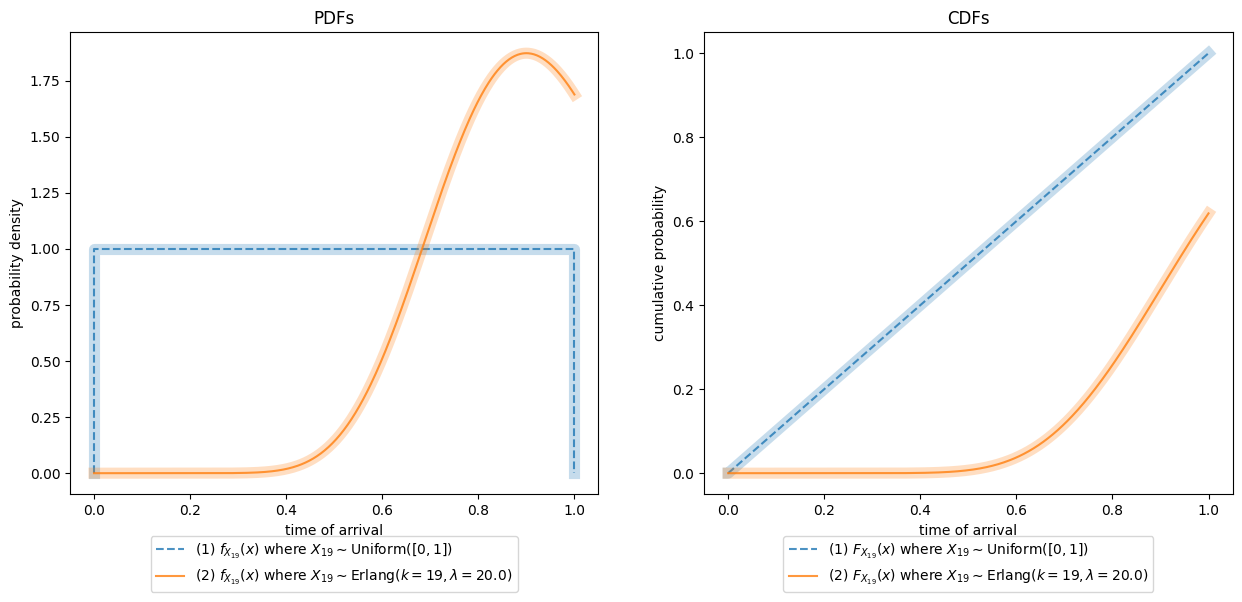

The above model believes the arrival can happen after the end of the time period, with probability 0.38142194944715513 0.38142194944715513 0.38142194944715513
[-0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8]
[0.         0.         0.07685809 0.23875564 0.42126741 0.59320476
 0.74170303 0.86352933 0.96012999 1.         1.        ]

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.         0.12480752 0.18334069 0.23162653 0.27495061 0.3153653
 0.35393419 0.39130209 0.42790316 0.46405381 0.5       ]


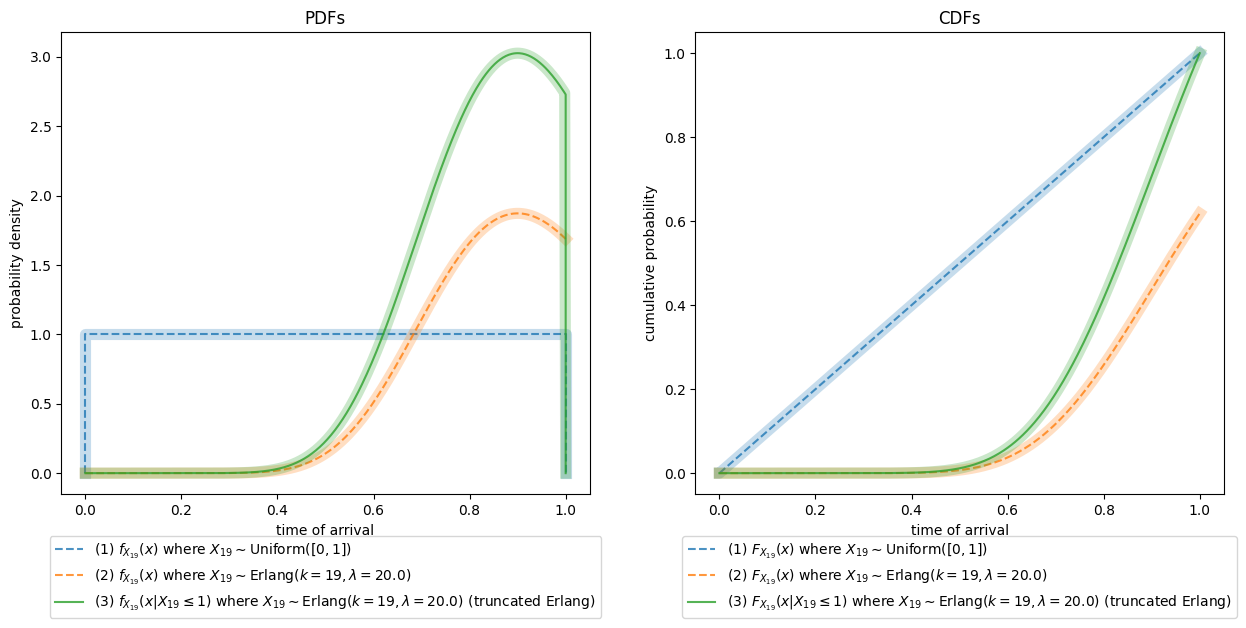

The above model believes the arrival can happen after the end of the time period, with probability 0.0 0.0 0.0


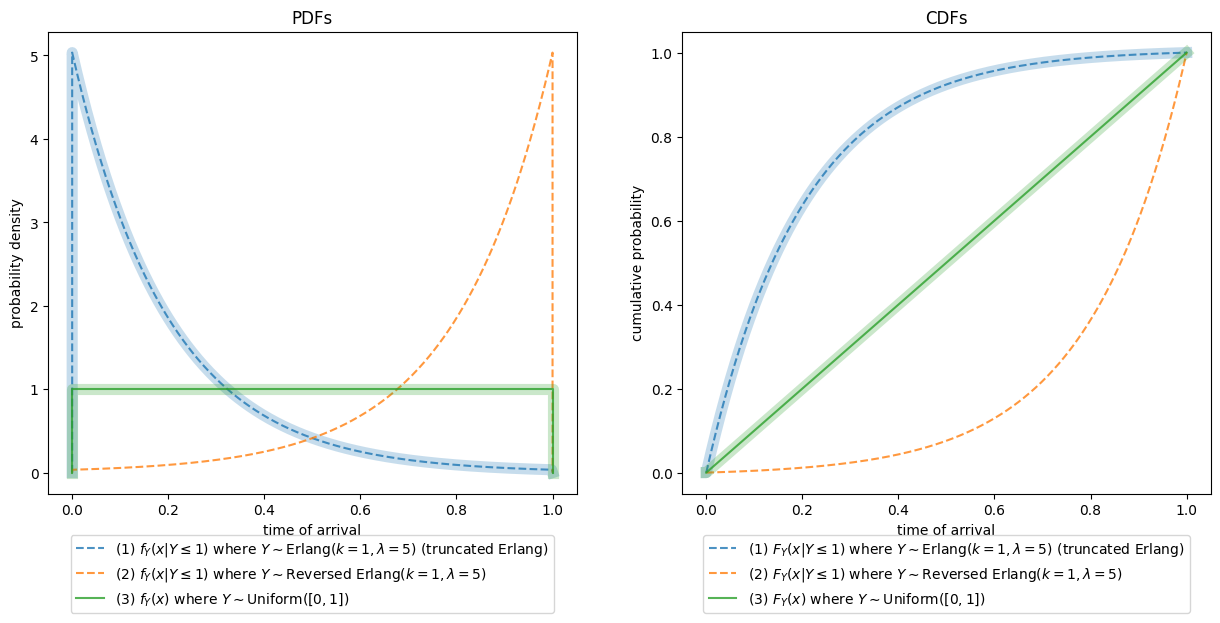

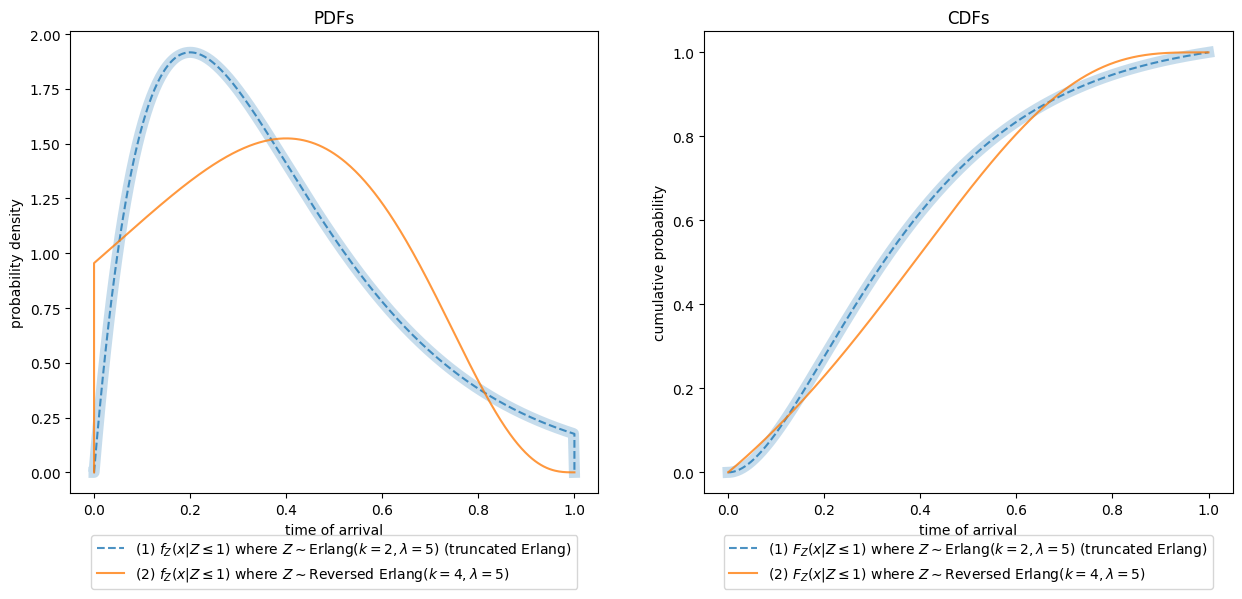

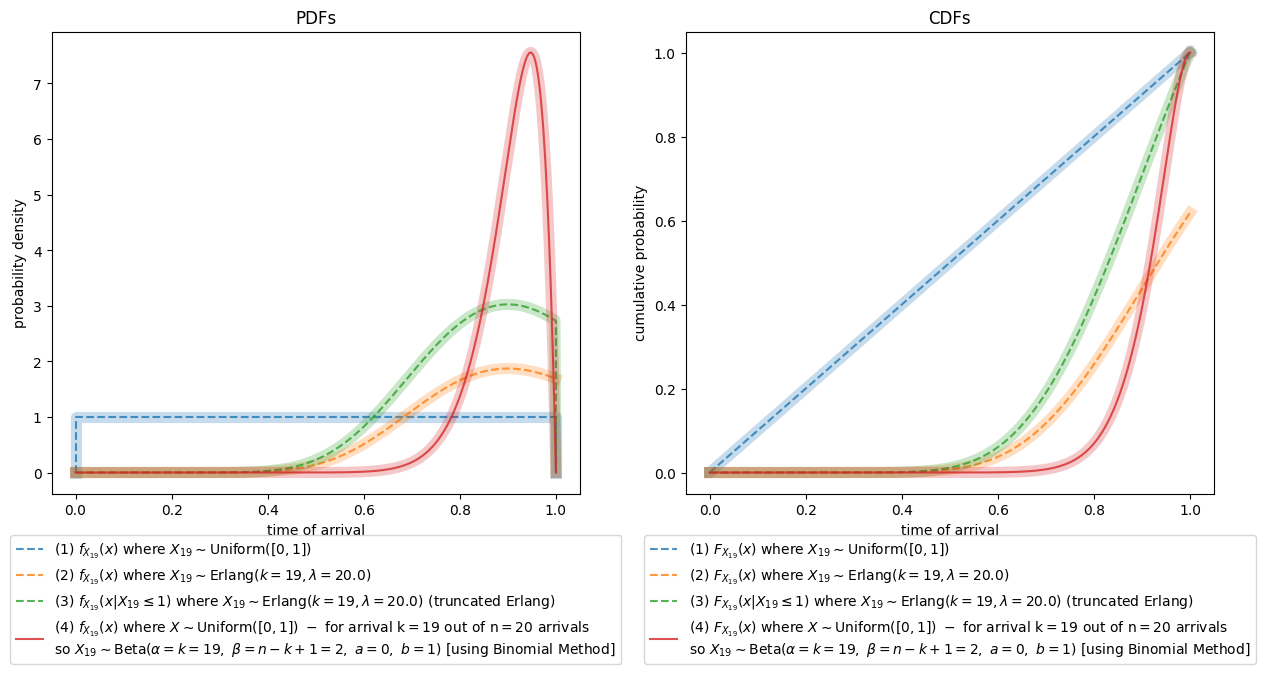

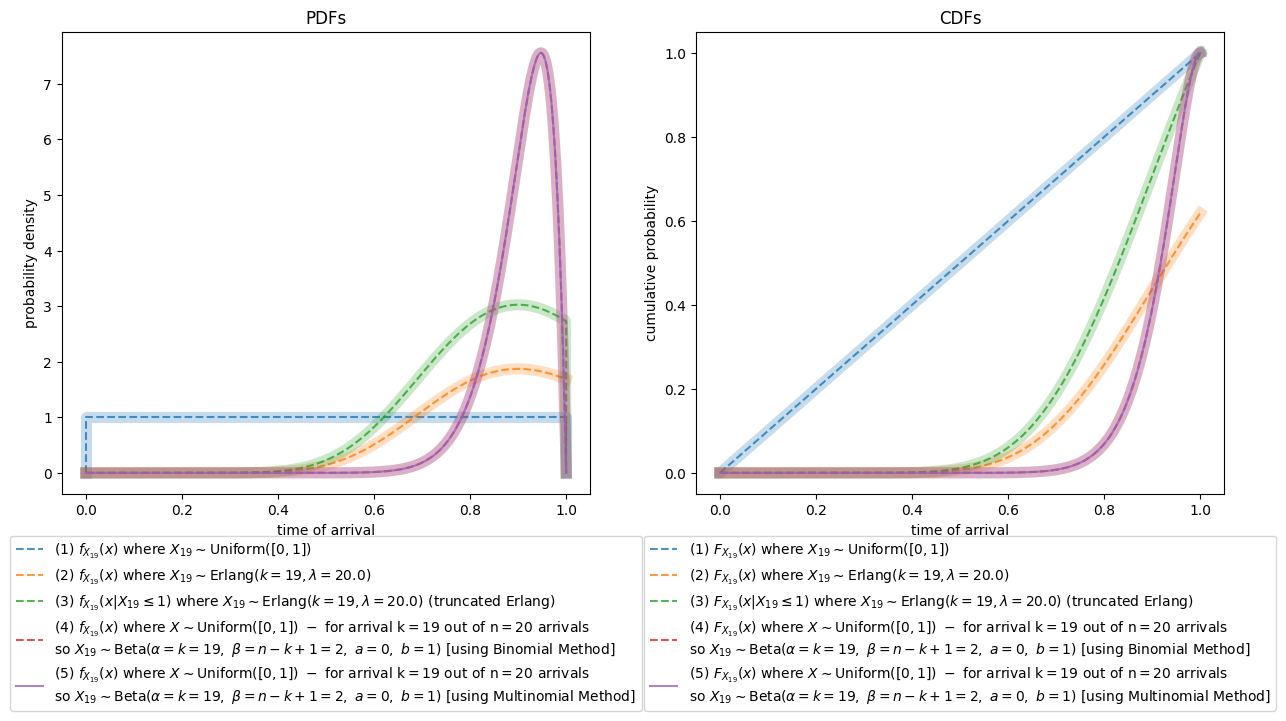

0.024312624865160615
0.024312624865162835


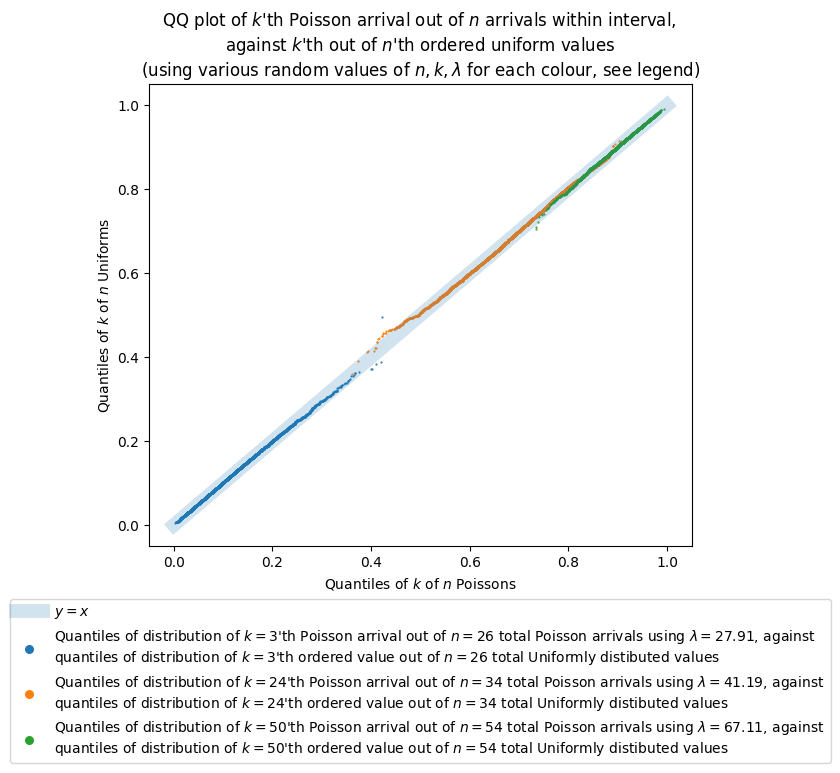

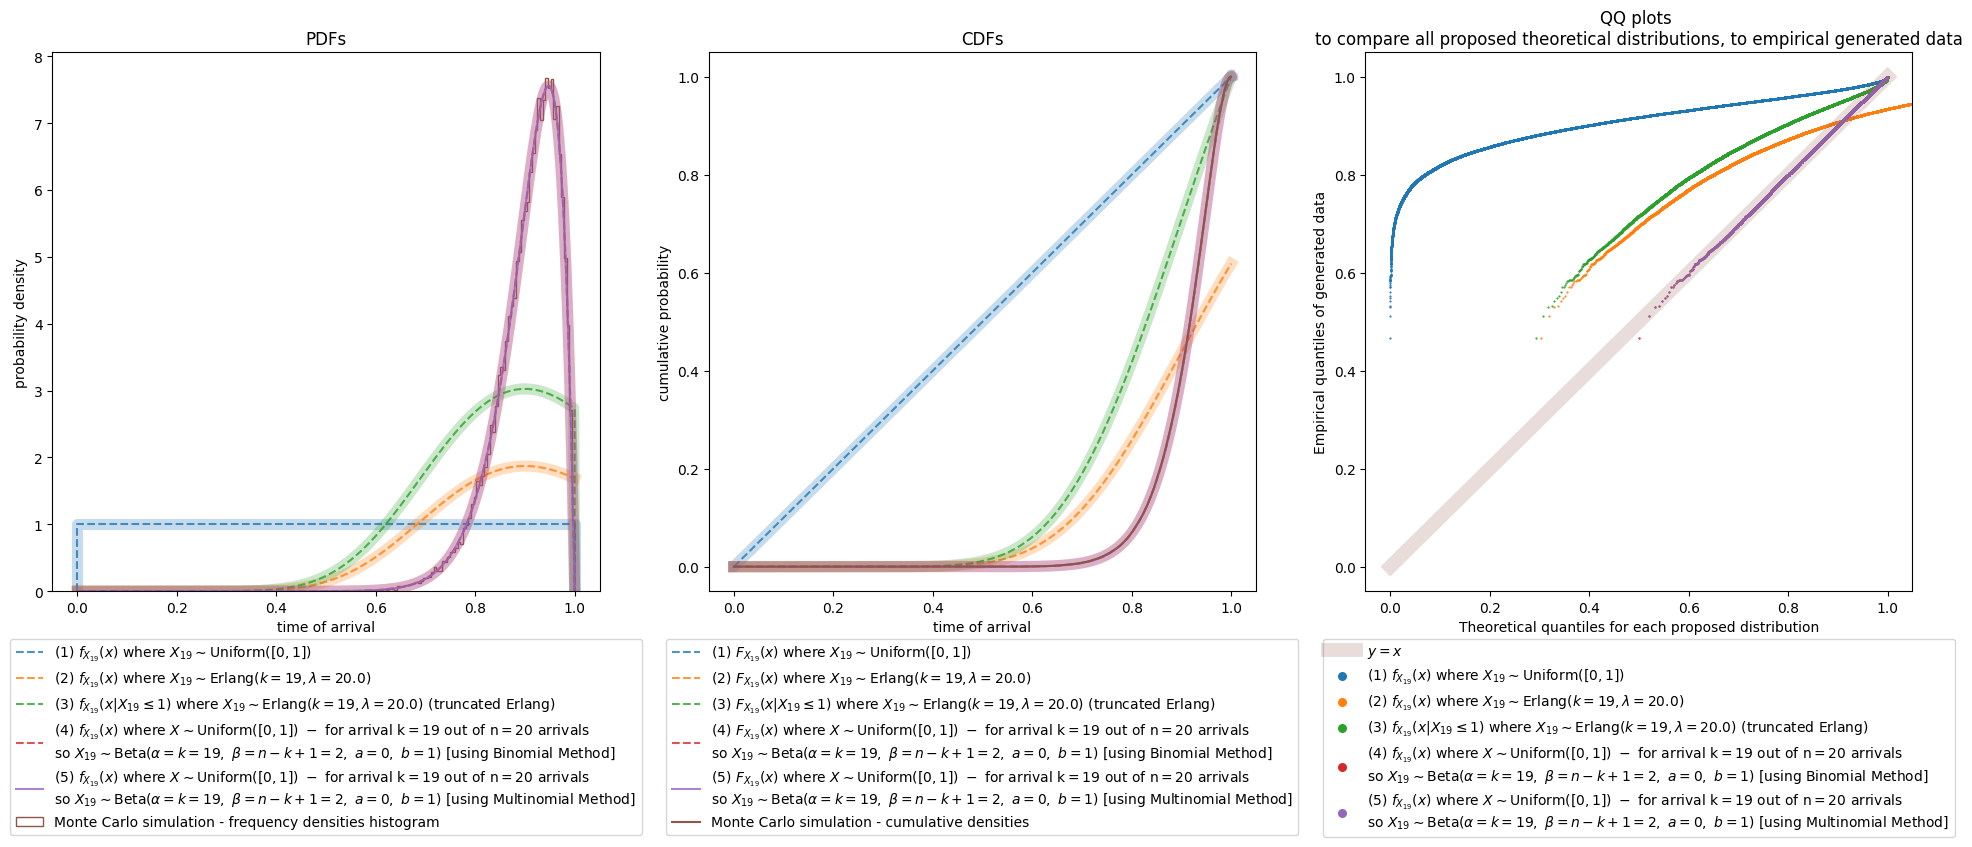

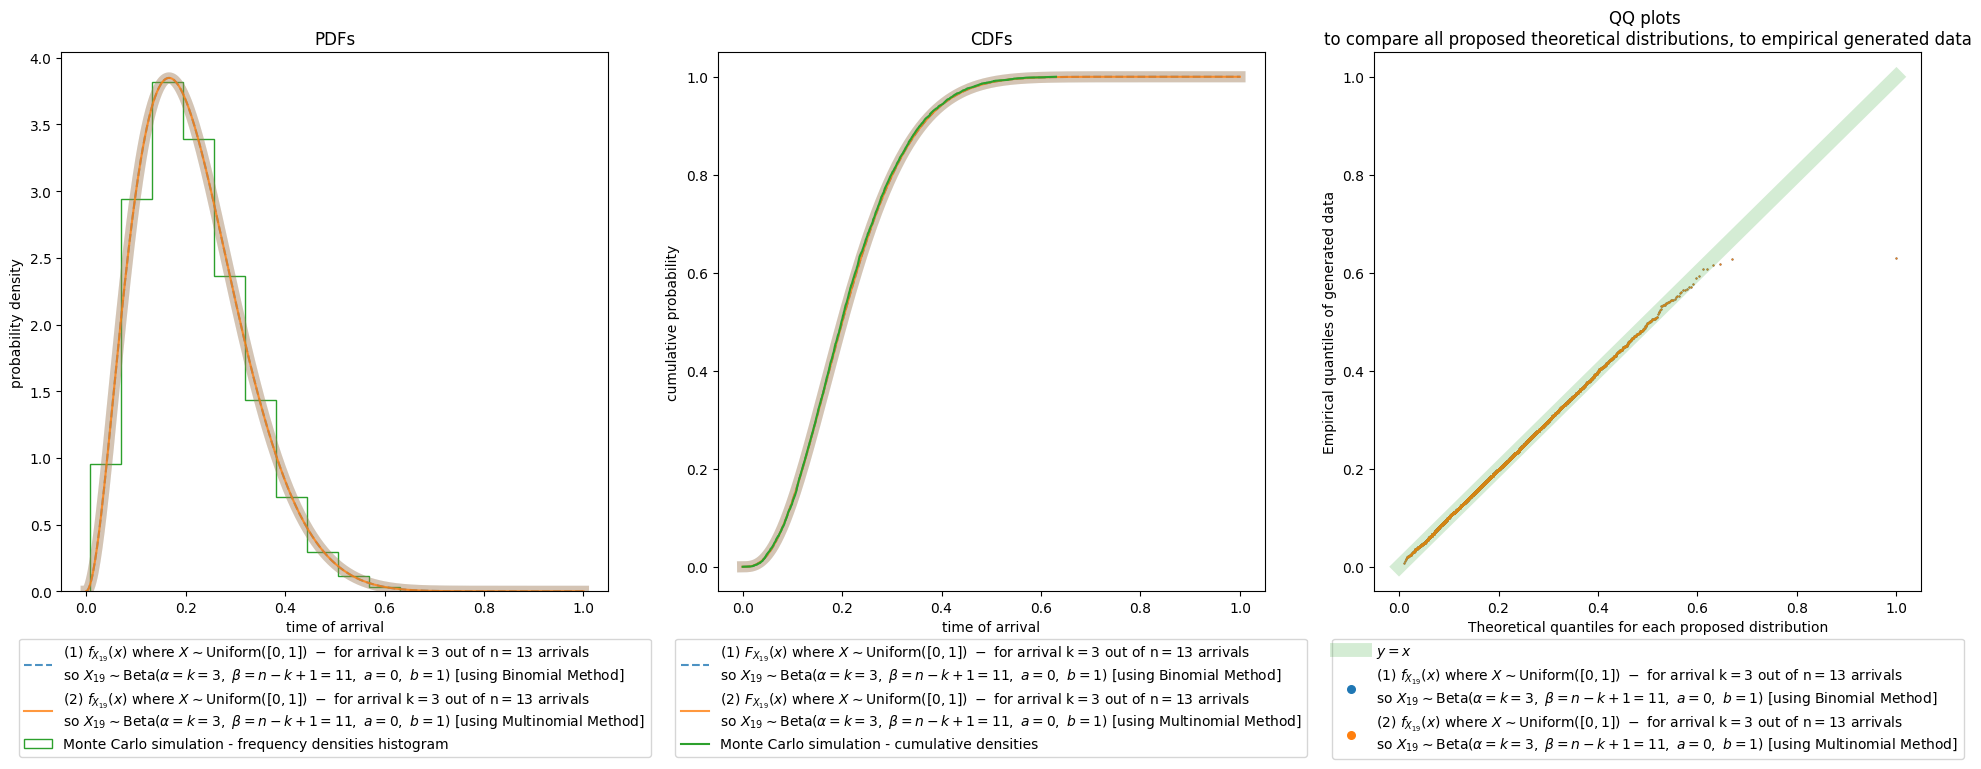

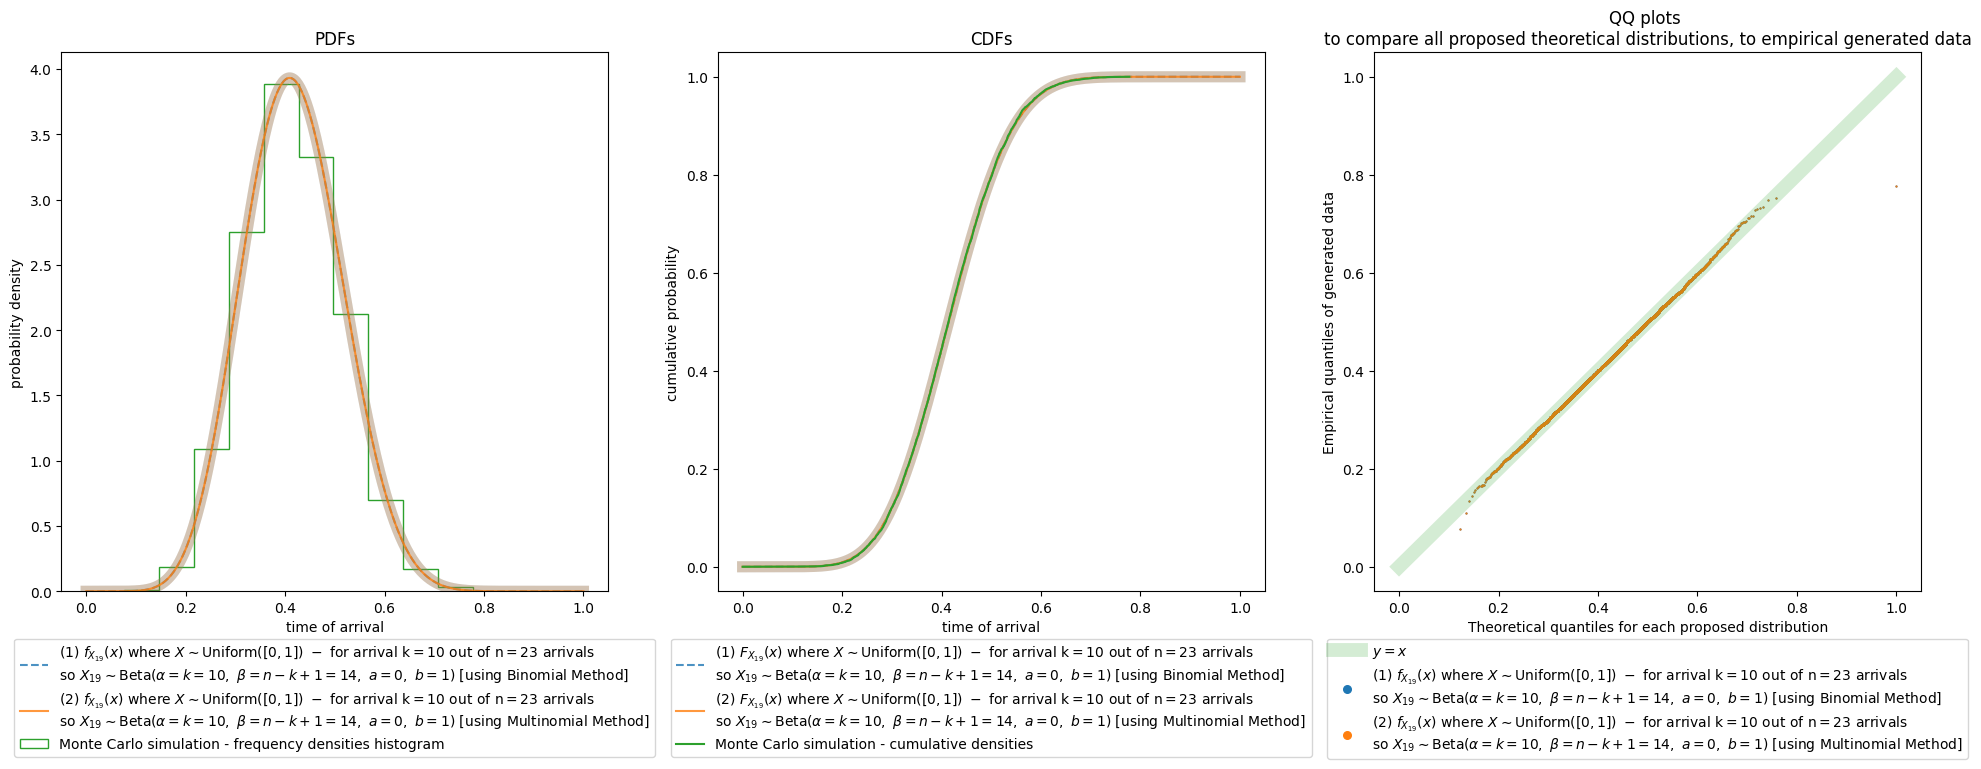

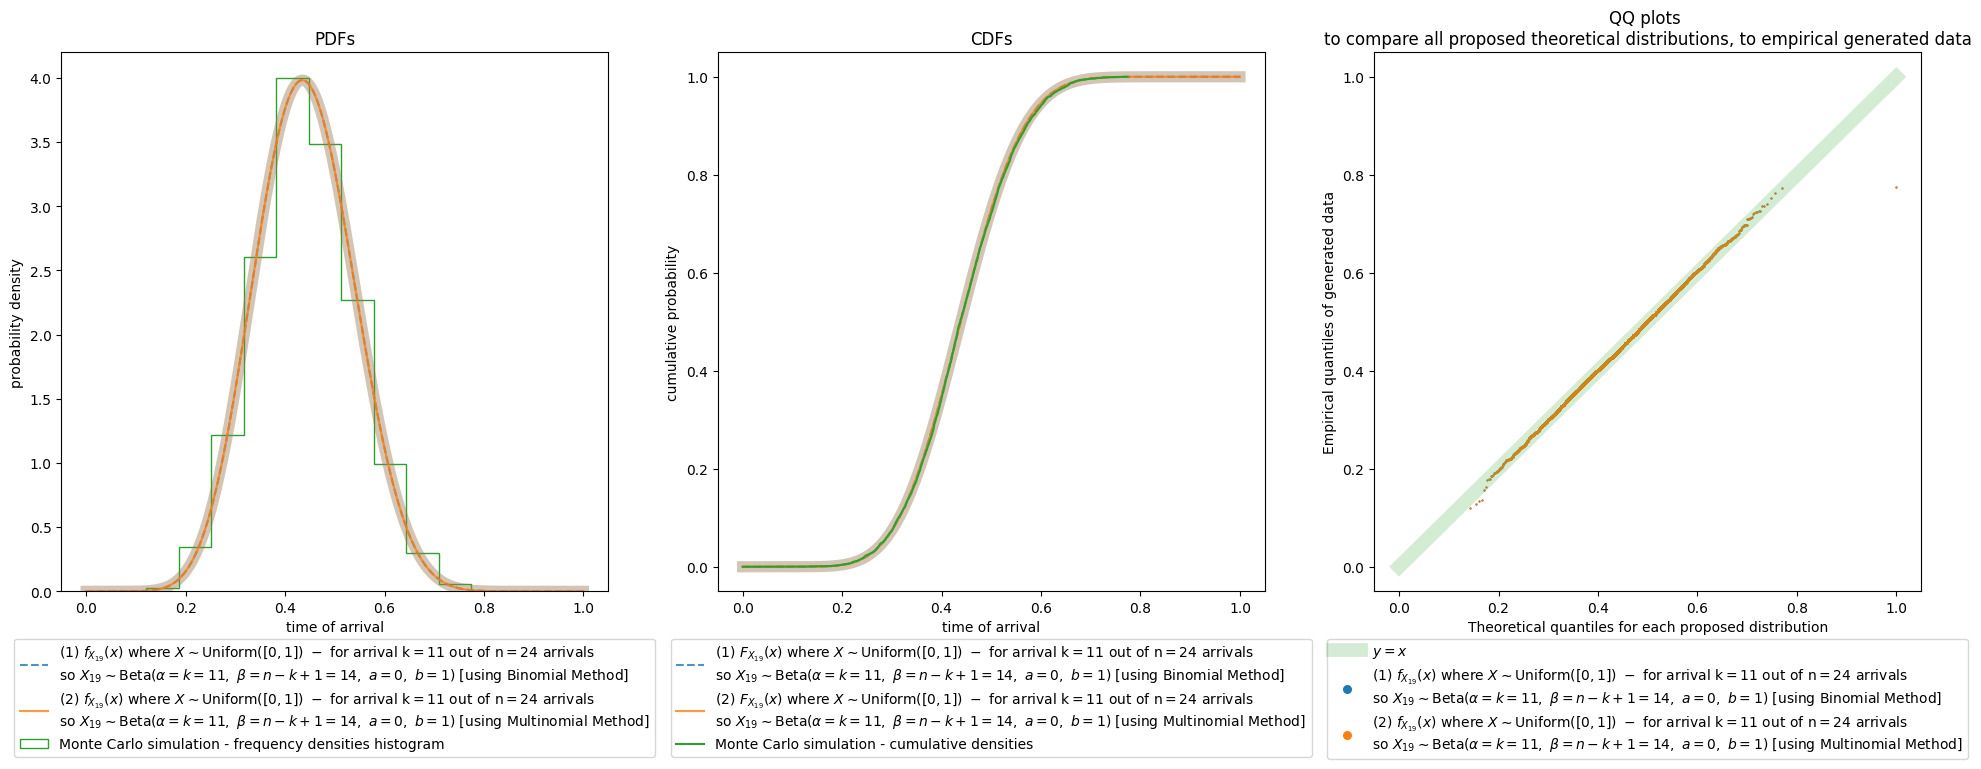

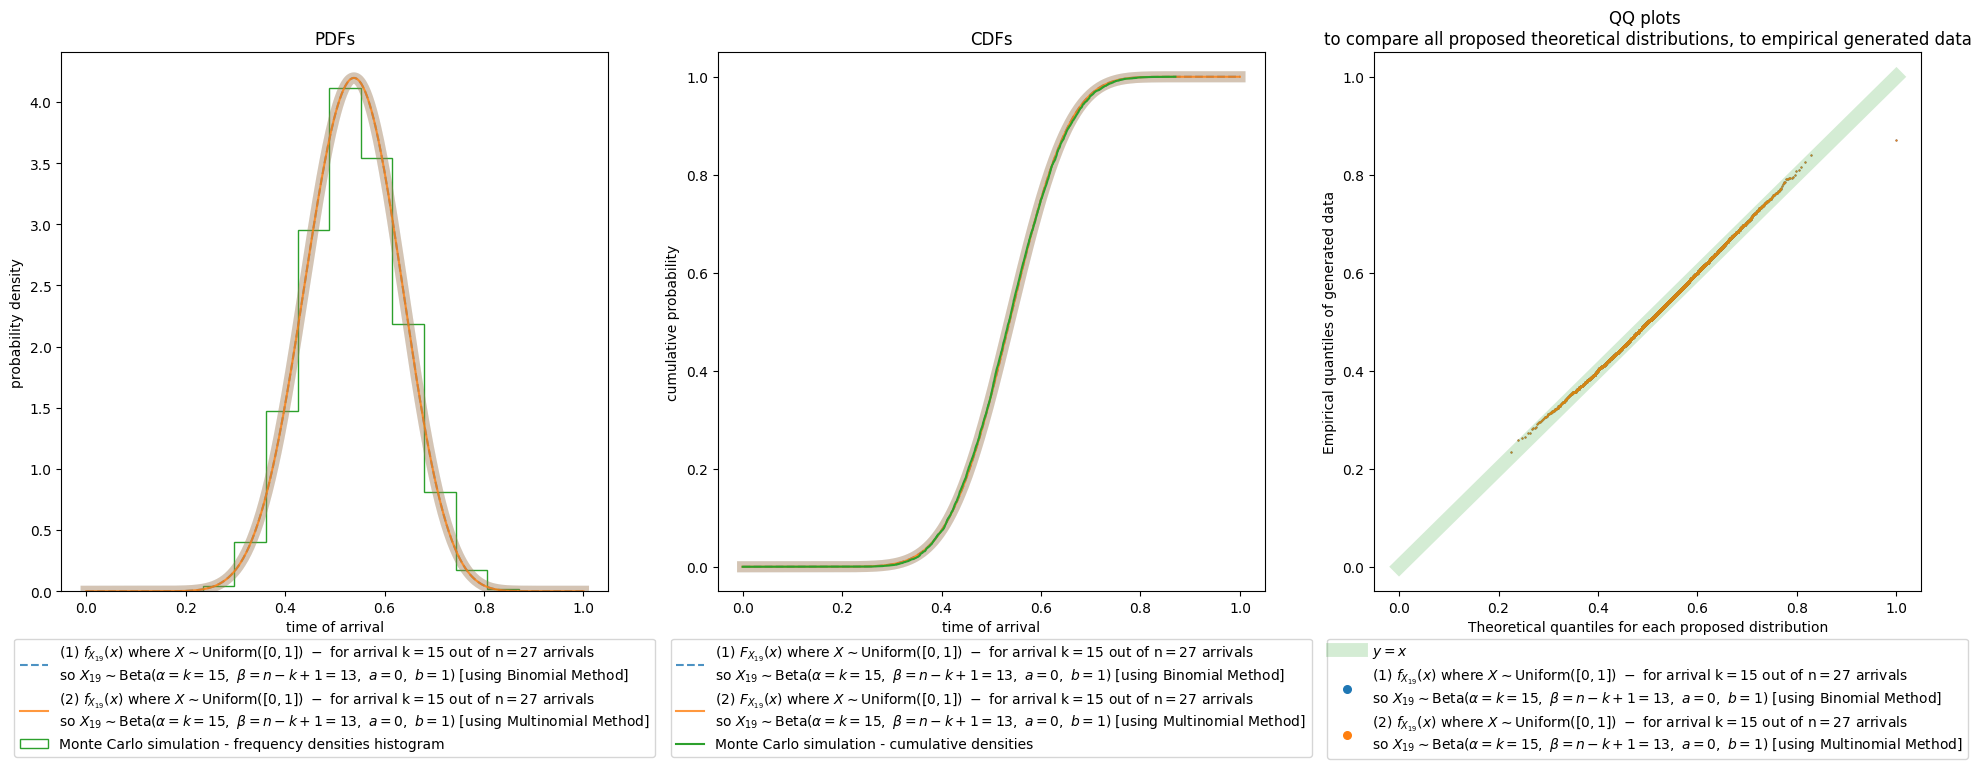

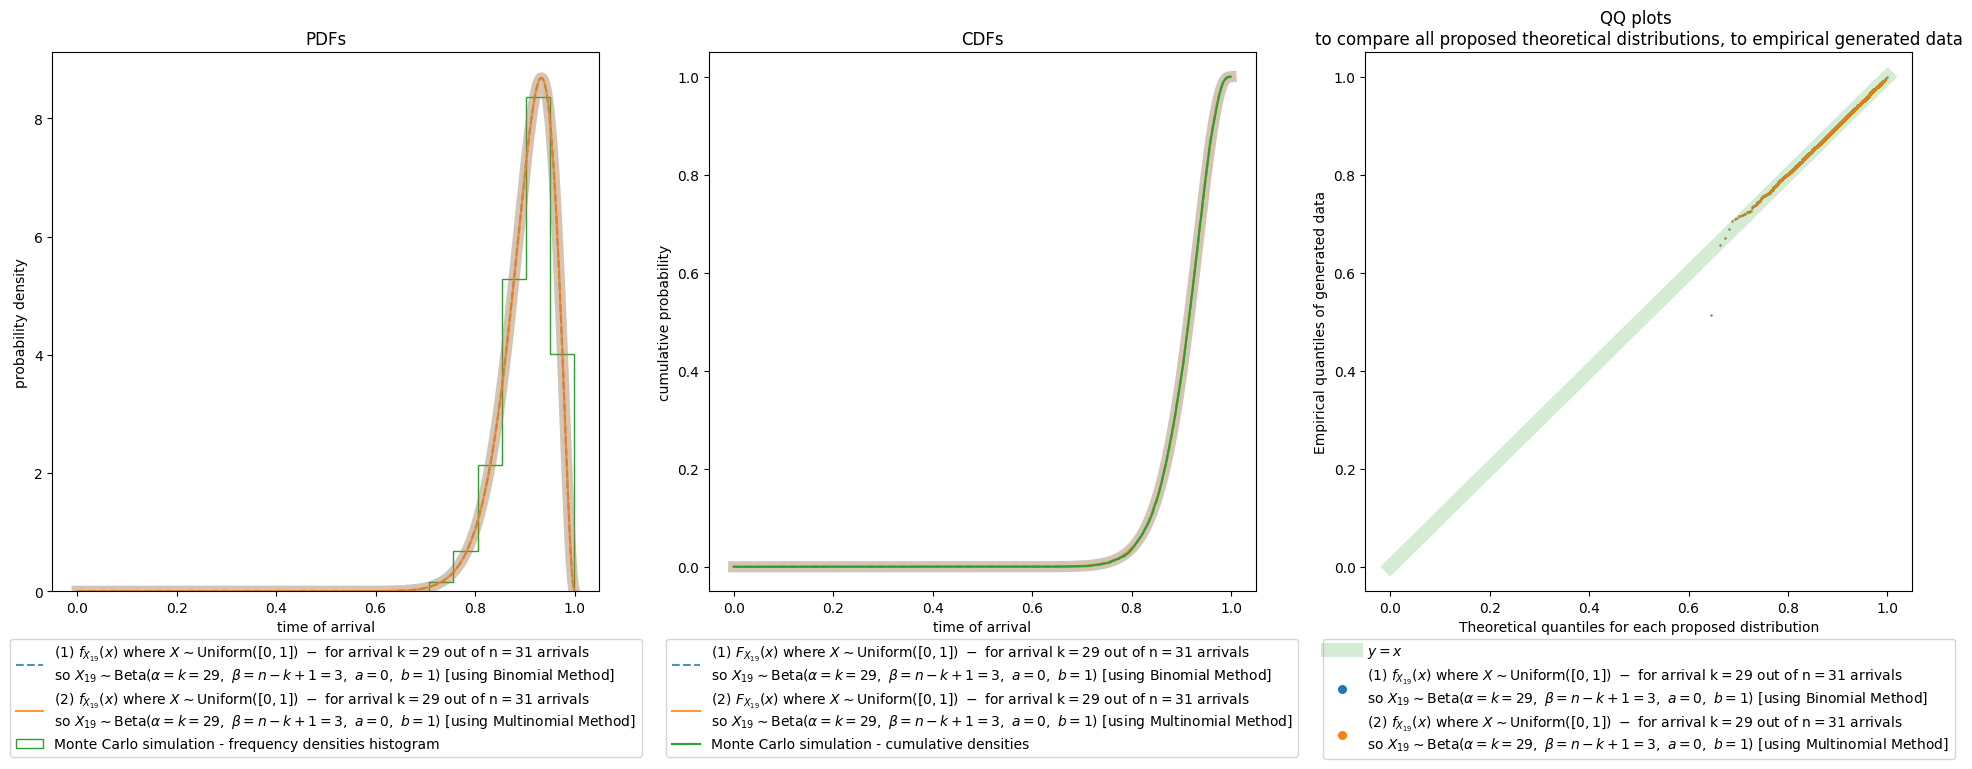

In [5]:
# get all functions from main notebook
# ignore the output from this cell - can be collapsed

%run "./Probability Problem - Pretend Poisson Processes.ipynb"


In [6]:
import pandas as pd
def fix_cdf(cdf):
    outside_bounds = (cdf<0) | (cdf>1)
    dodgy_idxs_1 = cdf <  np.hstack([[0], np.maximum.accumulate(cdf)[:-1]]) #where values are smaller than ANY earlier values
    dodgy_idxs_2 = cdf > np.hstack([cdf[1:], [1]])  #where values are greater than ONE NEAREST later value
    
    cdf[ outside_bounds] = np.nan
    cdf[dodgy_idxs_1 | dodgy_idxs_2 
                        ] = np.nan
    cdf[-1] = 1
    # print(cdf)
    cdf = np.array(pd.Series(cdf).interpolate(method='linear', limit=None, ))
    # print(cdf)
    return cdf #, dodgy_idxs_1 | dodgy_idxs_2

z=np.arange(21)/20
z[3] +=.15
z[17] -=.1
print(z)
fix_cdf(z)


[0.   0.05 0.1  0.3  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.75 0.9  0.95 1.  ]


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

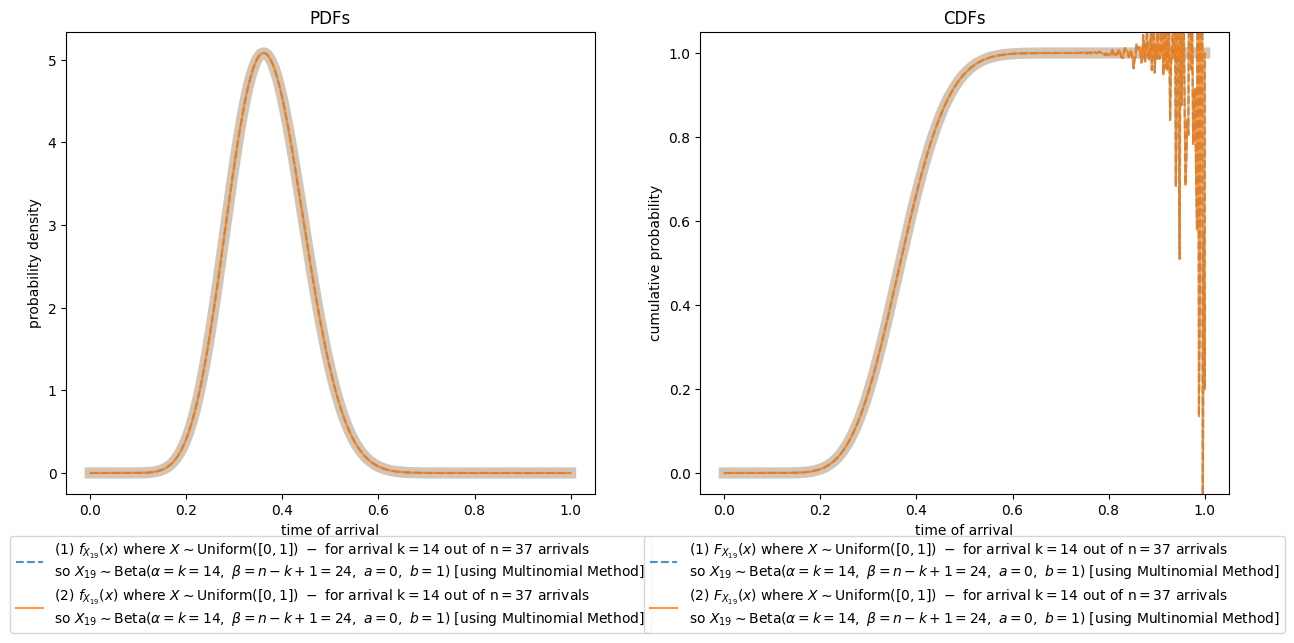

In [7]:
plot_multiple_PDFs_CDFs( 
    [k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=37, k=14),
     k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=37, k=14)]
    , support_subset=[a_start_time,b_end_time]) 

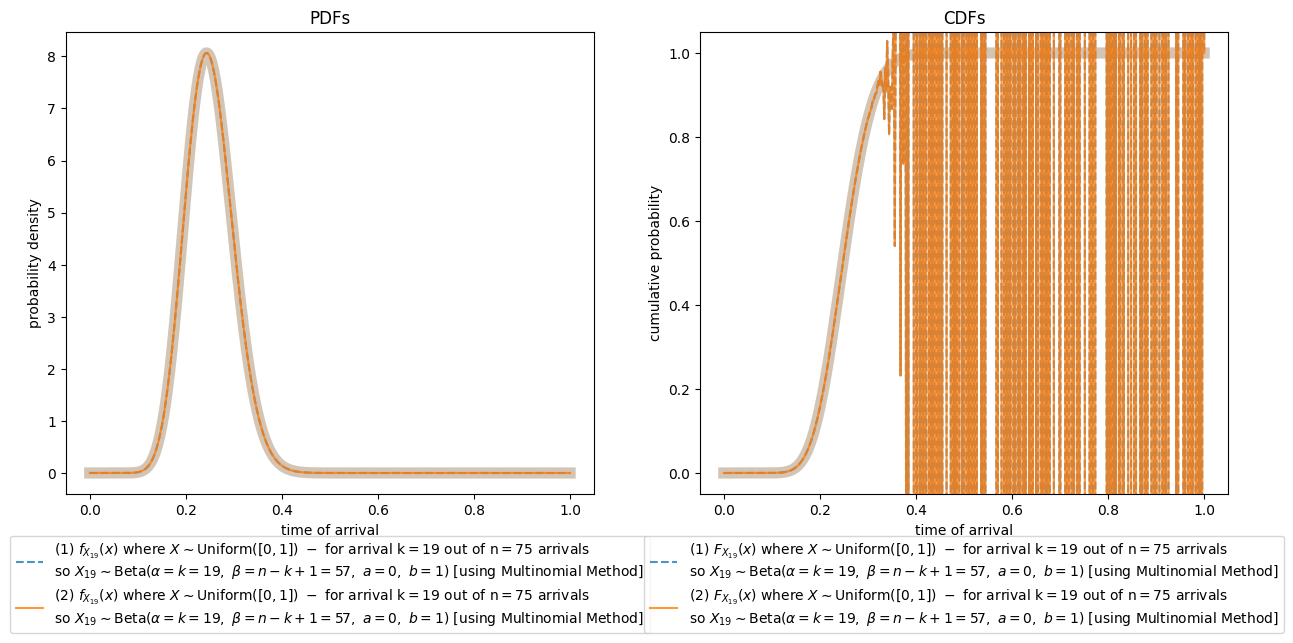

In [8]:
plot_multiple_PDFs_CDFs( 
    [k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=75, k=19),
     k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=75, k=19),],
    support_subset=[a_start_time,b_end_time]) 

In [9]:
def find_errors_cdf(cdf, precision=0.01, verbose=False):
    if (cdf < -precision).any():
        if verbose: print(1, cdf[cdf < -precision])
        return 1
    if (cdf > 1+precision).any():
        if verbose: print(2, cdf[cdf > 1+precision])
        return 2
    if (cdf[1:]-cdf[:-1] <= -precision).any():
        if verbose: print(3, cdf[1:][cdf[1:]-cdf[:-1] <= -precision])
        return 3
    return 0
    
def find_errors_pdf(pdf, precision=0.01, verbose=False):
    if (pdf <= -precision).any():
        if verbose: print(4, pdf[pdf <= -precision])
        return 10
    return 0

find_errors_cdf(np.array([.2,.5,.5,1]))

0

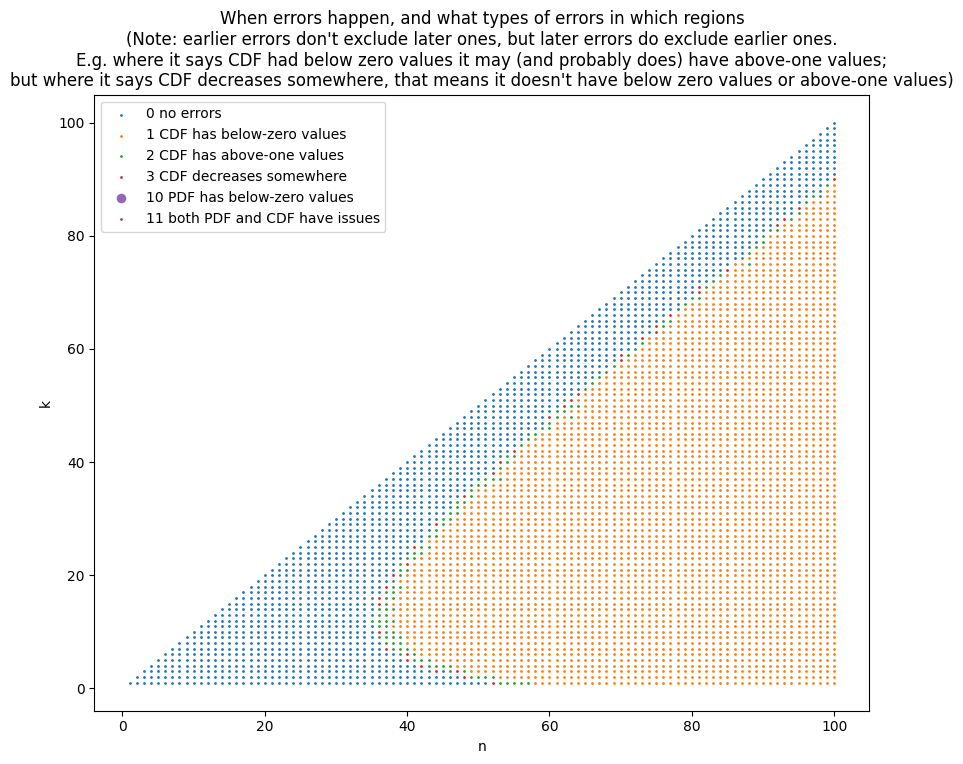

In [10]:
show_plots = False          #if set to true, will show all plots - suggest decreasing ranges of n and k if so.

k_s = []
n_s = []
error_types = []

if show_plots: test = []

for n in range(1,101,1):

    for k in range(1, n+1, 1):#(n-4)//5):

        pdf, cdf = k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=n,k=k)[2](np.linspace(0,1,100+1))
        errors_cdf = find_errors_cdf(cdf, precision=0.1)
        errors_pdf = find_errors_pdf(pdf, precision=0.1)

        n_s.append(n)
        k_s.append(k)
        error_types.append(errors_pdf + errors_cdf)

        if show_plots: 
            if errors_cdf + errors_pdf > 0:
                test.append(   k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=n,k=k,)      )
                if len(test)>=10:
                    plot_multiple_PDFs_CDFs(test, support_subset=[0,1])
                    test=[]

k_s, n_s, error_types = np.array(k_s), np.array(n_s), np.array(error_types)

plt.figure(figsize=(10,8))
plt.scatter(n_s[error_types==0], k_s[error_types==0], label='0 no errors', s=1)
plt.scatter(n_s[error_types==1], k_s[error_types==1], label='1 CDF has below-zero values', s=1)
plt.scatter(n_s[error_types==2], k_s[error_types==2], label='2 CDF has above-one values', s=1)
plt.scatter(n_s[error_types==3], k_s[error_types==3], label='3 CDF decreases somewhere', s=1)
plt.scatter(n_s[error_types==10], k_s[error_types==10], label='10 PDF has below-zero values', s=35)
all_other_errors_idxs = np.isin(error_types, [0,1,2,3,10], invert=True)
plt.scatter(n_s[all_other_errors_idxs], k_s[all_other_errors_idxs], label='11 both PDF and CDF have issues', s=1)

plt.ylabel('k')
plt.xlabel('n')
plt.legend()
plt.title("When errors happen, and what types of errors in which regions" +
    "\n(Note: earlier errors don't exclude later ones, but later errors do exclude earlier ones." + 
    "\nE.g. where it says CDF had below zero values it may (and probably does) have above-one values;" +
    "\nbut where it says CDF decreases somewhere, that means it doesn't have below zero values or above-one values)")
plt.show()

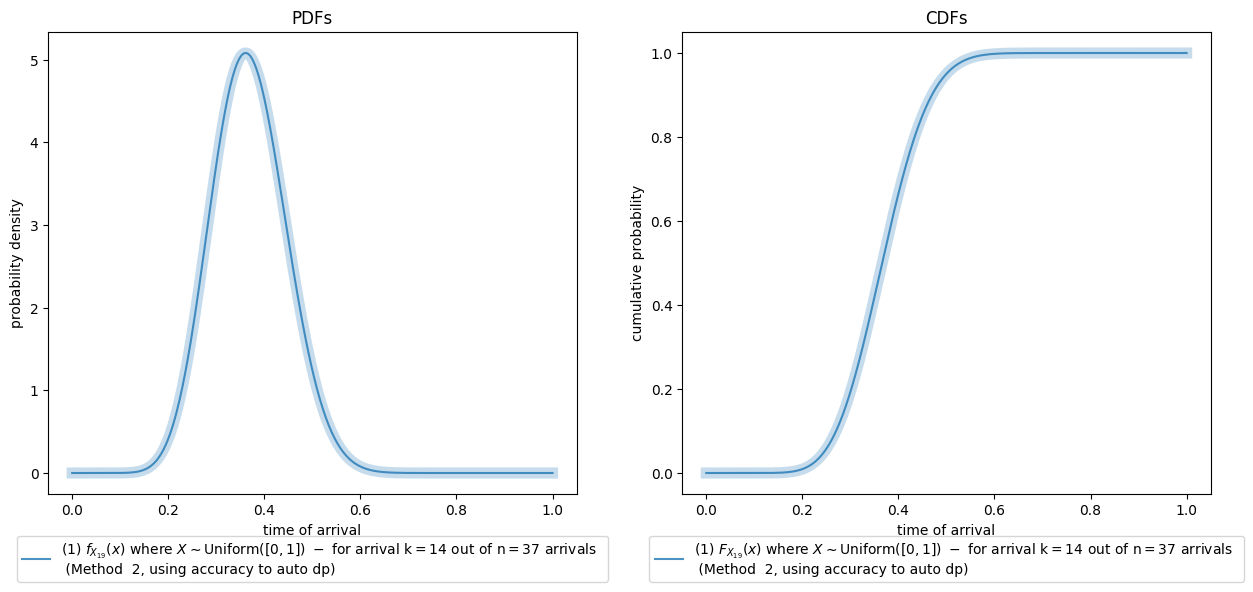

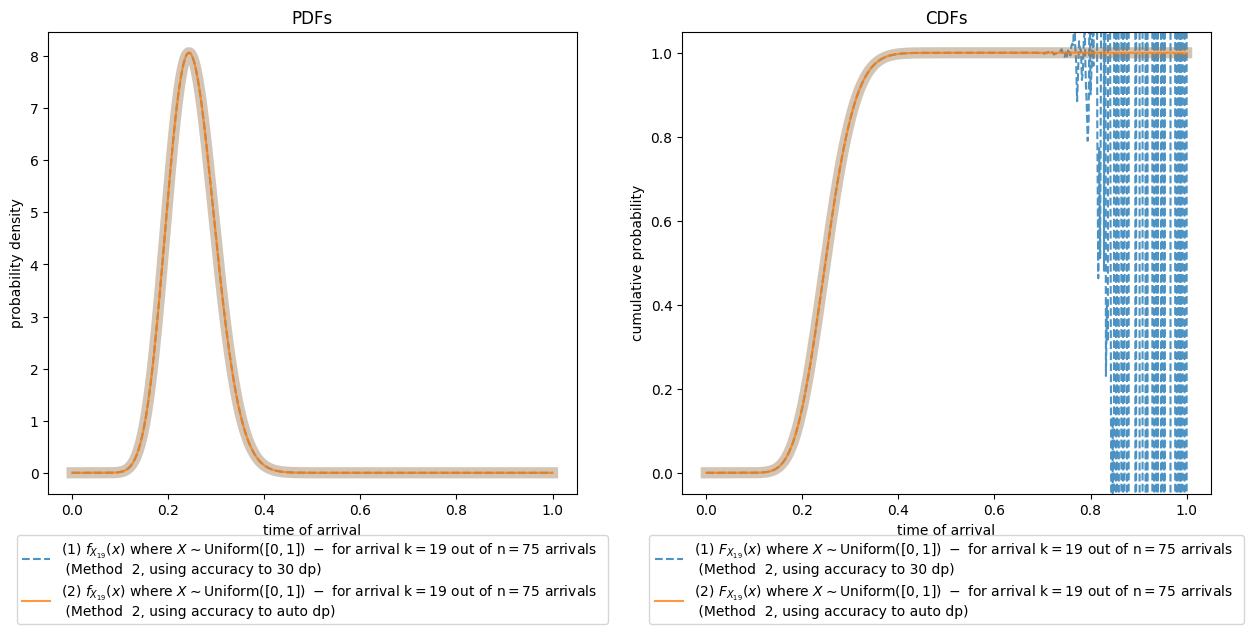

In [11]:
import decimal
from decimal import Decimal

def k_of_n_uniform_a_b_using_multinomial_fixed(a, b, n, k, RV_symbol=RV_symbol, apply_fix_cdf=False, dec_precision='auto'):
    '''If you have a uniform(a,b) distribution, and draw n RVs from it, and order them ascending order,
    finds the prob dist of the k'th RV '''

    def k_of_n_uniform_a_b_fitted_using_multinomial_fixed(x):
        # x=x.astype(np.longdouble)
        part1 = scipy.special.comb(n,k, exact=True) * k
        denominator = (b-a) ** n

        pdf_part2 = (x-a) ** (k-1)
        pdf_part3 = (b-x) ** (n-k)
        pdf = part1*pdf_part2*pdf_part3 / denominator
        pdf[(x<a) | (x>b) ] = 0

        cdf_is_inaccurate = True
        if dec_precision=='auto':   decimal.getcontext().prec=10
        else:                       decimal.getcontext().prec=dec_precision

        while cdf_is_inaccurate:
            
            cdf_part2=(-1)**(n-k)
            sum_cdf_parts3456 = [Decimal(0)] * len(x)
            for j in range(0, n-k+1): 
                cdf_part3 = scipy.special.comb(n-k, j, exact=True) 
                cdf_part4 = (a-b)**j
                cdf_part5 = [Decimal(x_i-a)**(n-j) for x_i in x]
                # cdf_part5 = decimal_array_ops(array=x, func=lambda x : (x-a)**(n-j))
                cdf_part6 = n-j
                # print(j, '(x-a)', (x-a), '(n-j)', (n-j), '(x-a)**(n-j)', cdf_part5,)
                # print(j, part1, cdf_part2, cdf_part3, cdf_part4 , cdf_part5.round(2), cdf_part6, denominator)
                cdf_parts3456 = [(cdf_part3 * cdf_part4 * cdf_part5_i / cdf_part6) for cdf_part5_i in cdf_part5]
                sum_cdf_parts3456 = [sum_cdf_parts3456[i] + cdf_parts3456[i] for i in range(len(cdf_parts3456))]

            cdf = [(part1 * cdf_part2 * sum_cdf_parts3456_i / denominator) for sum_cdf_parts3456_i in sum_cdf_parts3456]
            cdf = np.array(cdf)

            if dec_precision=='auto':   
                errors_cdf = find_errors_cdf(cdf, precision=0.01)
                if errors_cdf==0:
                    cdf_is_inaccurate=False
                else:
                    decimal.getcontext().prec += 10
            else:
                cdf_is_inaccurate=False

        # print(cdf_part5)
        # print(sum_cdf_parts3456)
        # print(cdf)
        # cdf[ (x>b) ] = 1
        # cdf[ (x<a) ] = 0
        # cdf[1:]  = np.maximum(cdf[1:], np.max(cdf[:-1]))     #each value must always be at least as great as greatest previous value
        # cdf[:-1] = np.minimum(cdf[:-1], np.min(cdf[1:]))     #each value must always be smaller or equal to smallest following value
        if apply_fix_cdf:
            cdf = fix_cdf(cdf)
        # print(cdf[-1], type(cdf[-1]), cdf[-2], type(cdf[-2]), cdf_part5[-2], type(cdf_part5[-2]), x[-2], type(x[-2]))
        # if dec_precision=='auto':   print(decimal.getcontext().prec, end=',')
        return pdf, cdf


    name = (r'$f_{'+RV_symbol+'}(x) \ \mathrm{where}' 
            + ' \ X \sim  \mathrm{Uniform}(['+str(a)+','+str(b)+']) ' 
            + ' \mathrm{ \ - \ for \ arrival \ k='+str(k)
            + ' \ out \ of \ n='+str(n)+' \ arrivals \ }$'
            + ' \n (Method  2, using accuracy to '+str(dec_precision)+' dp)')
    
    #we will shortly show that this is actually equivalent to the Beta distribution!
    scipy_frozen_RV = scipy.stats.beta(k, n-k+1, loc=a, scale=b-a)
    #scipy parameterises the 4-param beta using the start of the interval (loc=a) and the width of the interval (scale=b-a)

    return name, scipy_frozen_RV, k_of_n_uniform_a_b_fitted_using_multinomial_fixed 

plot_multiple_PDFs_CDFs( 
    [
    #  k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=37, k=14),
    #  k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=37, k=14, ),
     k_of_n_uniform_a_b_using_multinomial_fixed(a=0, b=1, n=37, k=14),]
    , support_subset=[0,1]) 

plot_multiple_PDFs_CDFs( 
    [
    #  k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=75, k=19),
    #  k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=75, k=19, ),
     k_of_n_uniform_a_b_using_multinomial_fixed(a=0, b=1, n=75, k=19, dec_precision=30),
     k_of_n_uniform_a_b_using_multinomial_fixed(a=0, b=1, n=75, k=19, dec_precision='auto'),
     ]
    , support_subset=[0,1]) 



Context(prec=50, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[Inexact, FloatOperation, Rounded], traps=[InvalidOperation, DivisionByZero, Overflow])


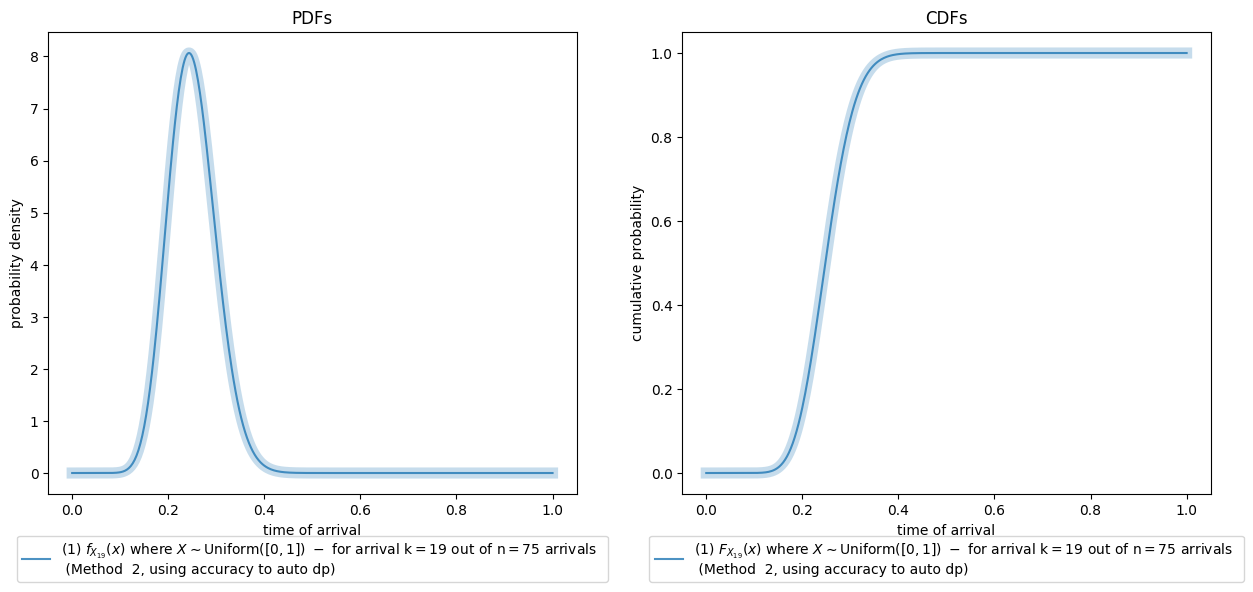

In [12]:
decimal.getcontext().prec=50  # extra-high precision
print(decimal.getcontext())

plot_multiple_PDFs_CDFs( 
    [
    #  k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=75, k=19),
    #  k_of_n_uniform_a_b_using_multinomial(a=0, b=1, n=75, k=19, ),
     k_of_n_uniform_a_b_using_multinomial_fixed(a=0, b=1, n=75, k=19),
     ]
    , support_subset=[0,1]) 


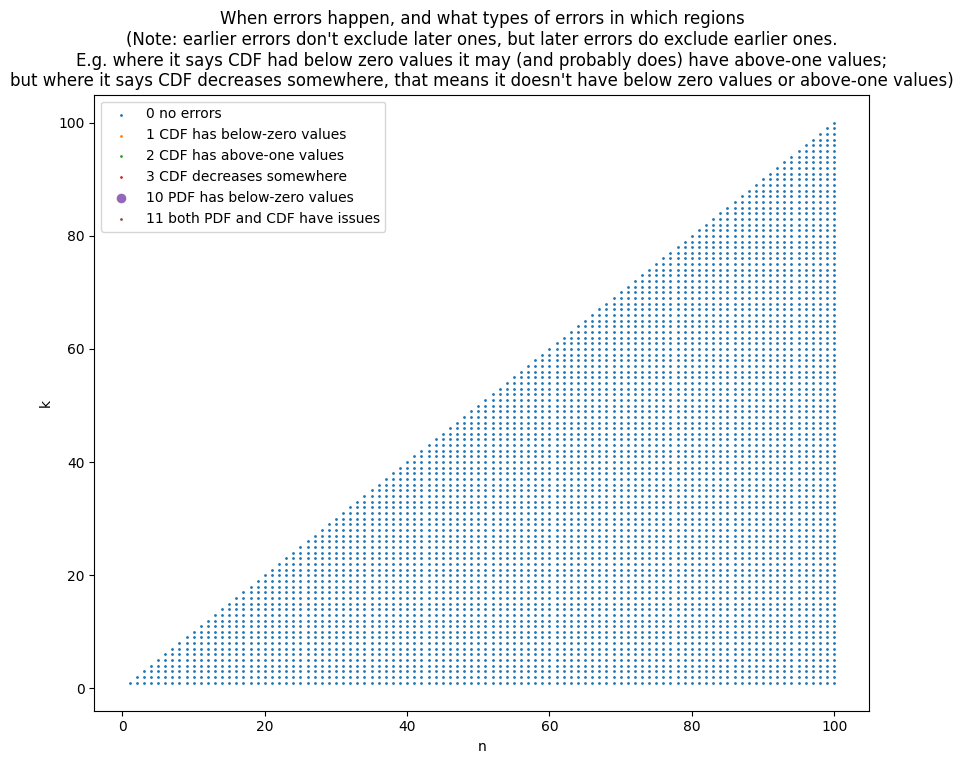

In [13]:
show_plots = True          #if set to true, will show all plots - suggest decreasing ranges of n and k if so.

k_s = []
n_s = []
error_types = []

if show_plots: test = []

for n in range(1,101,1):

    for k in range(1, n+1, 1):#(n-4)//5):

        pdf, cdf = k_of_n_uniform_a_b_using_multinomial_fixed(a=0, b=1, n=n,k=k)[2](np.linspace(0,1,100+1))
        errors_cdf = find_errors_cdf(cdf, precision=0.1)
        errors_pdf = find_errors_pdf(pdf, precision=0.1)

        n_s.append(n)
        k_s.append(k)
        error_types.append(errors_pdf + errors_cdf)

        if show_plots: 
            if errors_cdf + errors_pdf > 0:
                test.append(   k_of_n_uniform_a_b_using_multinomial_fixed(a=0, b=1, n=n,k=k,)      )
                if len(test)>=10:
                    plot_multiple_PDFs_CDFs(test, support_subset=[0,1])
                    test=[]

k_s, n_s, error_types = np.array(k_s), np.array(n_s), np.array(error_types)

plt.figure(figsize=(10,8))
plt.scatter(n_s[error_types==0], k_s[error_types==0], label='0 no errors', s=1)
plt.scatter(n_s[error_types==1], k_s[error_types==1], label='1 CDF has below-zero values', s=1)
plt.scatter(n_s[error_types==2], k_s[error_types==2], label='2 CDF has above-one values', s=1)
plt.scatter(n_s[error_types==3], k_s[error_types==3], label='3 CDF decreases somewhere', s=1)
plt.scatter(n_s[error_types==10], k_s[error_types==10], label='10 PDF has below-zero values', s=35)
all_other_errors_idxs = np.isin(error_types, [0,1,2,3,10], invert=True)
plt.scatter(n_s[all_other_errors_idxs], k_s[all_other_errors_idxs], label='11 both PDF and CDF have issues', s=1)

plt.ylabel('k')
plt.xlabel('n')
plt.legend()
plt.title("When errors happen, and what types of errors in which regions" +
    "\n(Note: earlier errors don't exclude later ones, but later errors do exclude earlier ones." + 
    "\nE.g. where it says CDF had below zero values it may (and probably does) have above-one values;" +
    "\nbut where it says CDF decreases somewhere, that means it doesn't have below zero values or above-one values)")
plt.show()